In [1]:
pip install split-folders

In [2]:
import numpy as np
import splitfolders
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.losses import categorical_crossentropy
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import shutil

# Path to the file in Google Drive
file_path = '/content/drive/My Drive/dataset.zip'

# Destination path in /content/
destination_path = '/content/dataset.zip'

# Copy the file
shutil.copy(file_path, destination_path)


'/content/dataset.zip'

In [7]:
import zipfile

zip_path = 'dataset.zip'  # Replace with the path to your zip file
extract_to = '/content/'  # Replace with the directory where you want to extract the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted '{zip_path}' to '{extract_to}'")


Extracted 'dataset.zip' to '/content/'


In [8]:
splitfolders.ratio('/content/dataset',output='/content/datasplit', seed=1337, ratio=(0.7,0.2,0.1),group_prefix=None, move=False)

class_names=["FSK","NOT_FSK"]

#weights_path = 'E:/Drone_Signal_Classification/WITH_NOISE/Elsec_Dataset/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/train",
    classes = class_names,
    target_size = (224,224),
    batch_size = 16,
    class_mode = "binary",
    subset="training"
)


valid_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/val",
    classes = class_names,
    target_size = (224,224),
    batch_size = 16,
    class_mode = "binary",
)

test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "binary",
    shuffle = False
)


model_vgg16 = VGG16(input_shape=(224,224,3),include_top = False,weights ="imagenet")

for layer in model_vgg16.layers:
  layer.trainable=False


model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation ="sigmoid"))

model.summary()

model.compile(optimizer="adam",loss="binary_crossentropy",metrics =["accuracy"])



Copying files: 16000 files [00:01, 8097.91 files/s]


Found 11200 images belonging to 2 classes.
Found 3200 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                              

In [9]:
history = model.fit(train_generator,validation_data = valid_generator,epochs = 25)

Epoch 1/25
700/700 [==============================] - 65s 81ms/step - loss: 0.0994 - accuracy: 0.9710 - val_loss: 0.0231 - val_accuracy: 0.9941
Epoch 2/25
700/700 [==============================] - 58s 83ms/step - loss: 0.0397 - accuracy: 0.9846 - val_loss: 0.0180 - val_accuracy: 0.9922
Epoch 3/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0142 - val_accuracy: 0.9966
Epoch 4/25
700/700 [==============================] - 59s 85ms/step - loss: 0.0283 - accuracy: 0.9903 - val_loss: 0.0232 - val_accuracy: 0.9912
Epoch 5/25
700/700 [==============================] - 59s 85ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0639 - val_accuracy: 0.9784
Epoch 6/25
700/700 [==============================] - 59s 85ms/step - loss: 0.0229 - accuracy: 0.9908 - val_loss: 0.0142 - val_accuracy: 0.9962
Epoch 7/25
700/700 [==============================] - 59s 84ms/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.0140 - val_accuracy:

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc*100)

200/200 [==============================] - 12s 47ms/step - loss: 0.0452 - accuracy: 0.9894
test loss:  0.045228052884340286
test accuracy:  98.93749952316284


In [ ]:
import os
import glob

# Set the path to your folder
folder_path = '/content/datasplit/test/elsec'

# Loop through all files in the folder
for filename in glob.glob(os.path.join(folder_path, '*')):
    print('Processing file:', filename)


In [ ]:
from tensorflow.keras.preprocessing import image


results = []
folder_path = '/content/datasplit/test/mavic_classic'
for filename in glob.glob(os.path.join(folder_path, '*')):
    img_path = filename
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0

    y_pred = model.predict(img_array)
    predicted_class_index = np.argmax(y_pred, axis=1)
    results.append(predicted_class_index[0])
print(results)

1/1 [==============================] - 0s 30ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Found 1600 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
200/200 [==============================] - 8s 42ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


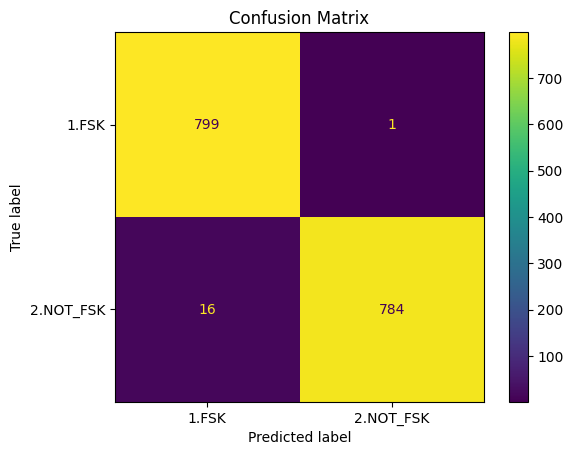

In [14]:
class_names=["1.FSK","2.NOT_FSK"]
test_generator = datagen.flow_from_directory(
    directory = "/content/datasplit/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 8,
    class_mode = "binary",
    shuffle = False
)


y_true =test_generator.classes
print(y_true)
y_pred = model.predict(test_generator)  # Get predicted probabilities
y_pred_binary = (y_pred > 0.5).astype(int)  # Classify based on threshold (0.5 is common)
print(y_pred_binary)
cm=confusion_matrix(y_true, y_pred_binary)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [13]:
model.save('/content/VGG16_model_binary_mod_classification_Using_constellation.keras')

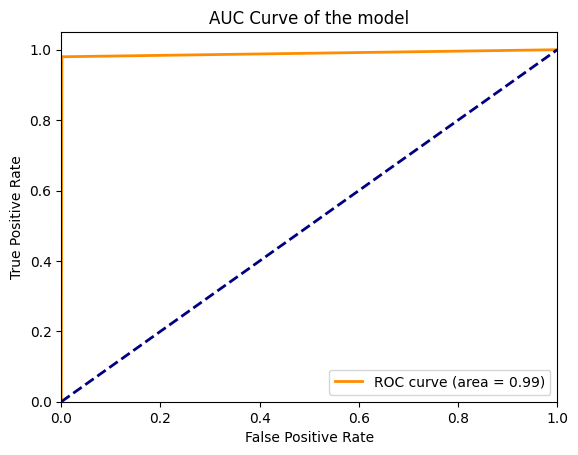

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve of the model')
plt.legend(loc="lower right")
plt.show()
